In [204]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [205]:
file_data = 'VideoGamesSales.csv'
df = pd.read_csv (file_data, sep=',')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='count', ylabel='Genre'>

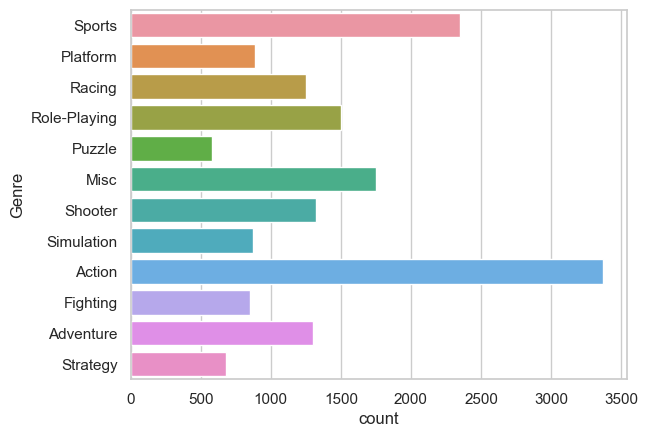

In [206]:
sns.countplot(y=df["Genre"])

Este grafico nos permite ver la cantidad de juegos, discriminados por genero, que contiene la lista. Podemos ver que los generos de "Accion" y "Deportes", son las que mas juegos tienen. Mientras que la categoria de "Rompecabezas", es la que menos juegos tiene.


<AxesSubplot: xlabel='count', ylabel='Platform'>

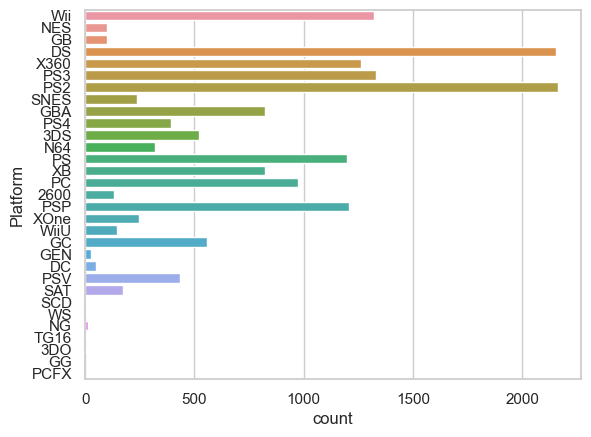

In [207]:
sns.countplot(y=df["Platform"])

Con este grafico podemos ver que plataformas han aportado mas juegos. En este caso, las consolas PS2 y Nintendo DS, son las que mas juegos aportaron a la lista.

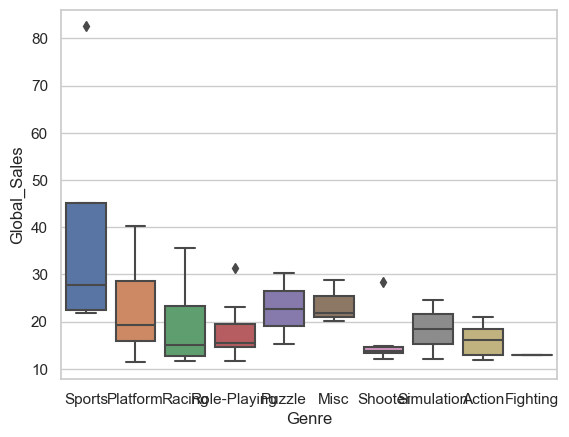

In [208]:
ax = sns.boxplot(x="Genre", y="Global_Sales", data=df.head(50))

Con este grafico podemos ver que la categoria de "Deportes" es la que tiene el puntaje mas alto de ventas globales, en promedio, con un juego en particular, que esta muy por encima de todos los demas.
NOTA: Para este grafico se tomaron los 50 juegos mas vendidos a nivel global.

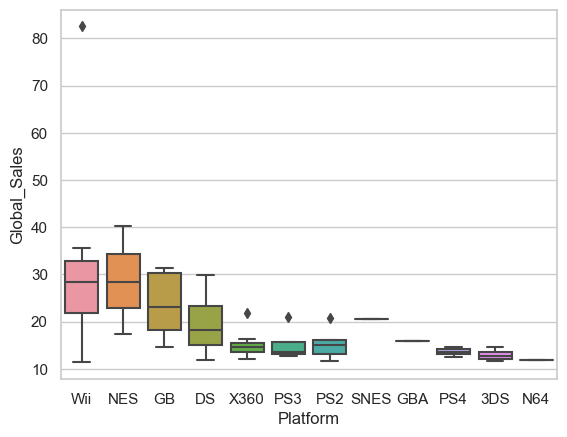

In [209]:
ax = sns.boxplot(x="Platform", y="Global_Sales", data=df.head(50))

Este grafico nos muestra cuales son las consolas que lideran en la lista de ventas globales. Vemos que la Nintendo Wii y la NES, son las que, en promedio, tienen mas ventas globales.
NOTA: Para este grafico se tomaron los 50 juegos mas vendidos a nivel global.

<AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>

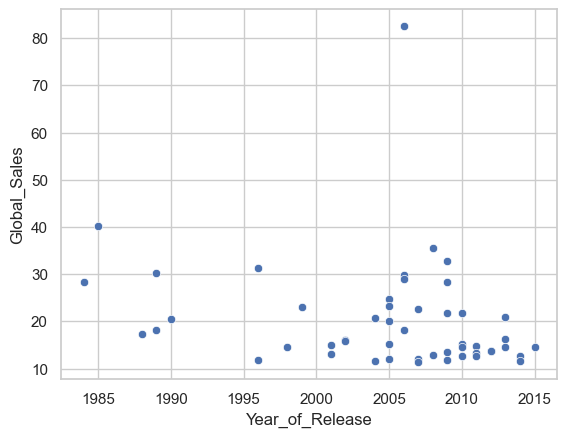

In [210]:
sns.scatterplot(data=df.head(50), x="Year_of_Release", y="Global_Sales")

Este grafico nos permite entender que la fecha de lanzamiento, no tiene incidencia con el puntaje de ventas global. Ya que un juego lanzado en el año 1985, tiene un puntaje mas alto que muchos juegos mas actuales.

<AxesSubplot: >

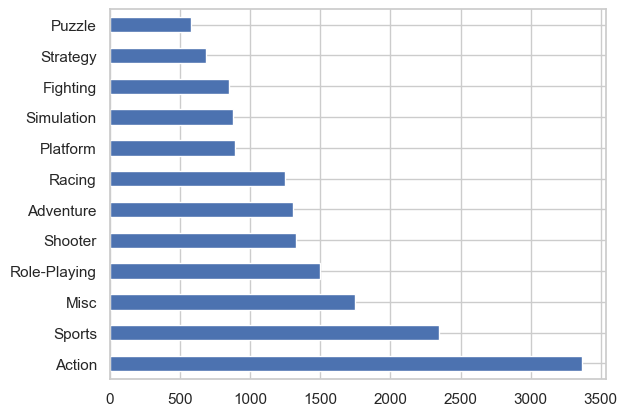

In [211]:
df.Genre.value_counts().plot.barh()

En este grafico solo ordenamos la cantidad de juegos por genero, de menor a mayor.

In [212]:
sum_df = df.groupby(['Genre'])['Global_Sales'].sum()
sum_df

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64

In [213]:
generos=df["Genre"].unique()
generos=generos[~pd.isnull(generos)]
generos

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Text(0.5, 1.0, 'Los generos con mas volumen de ventas')

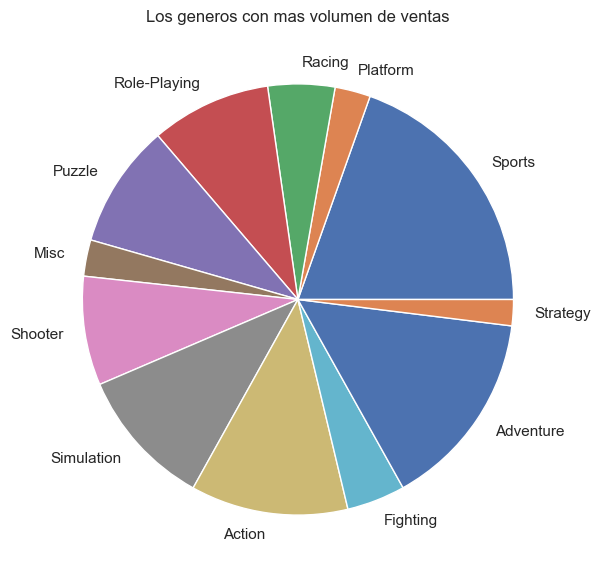

In [228]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(sum_df, labels = generos)
plt.title("Los generos con mas volumen de ventas")

Aqui vemos que los juegos con un mas alto puntaje de ventas a nivel global, son "Deportes" y "Aventuras", mientras que los de "Estrategia" y "Miscelaneos", los que menos tienen.

In [222]:
platform_sum = df.groupby("Platform")["Platform"].count()
platform_sum = platform_sum.nlargest(10)
platform_sum

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64

Text(0.5, 1.0, 'Las 10 plataformas con mas juegos')

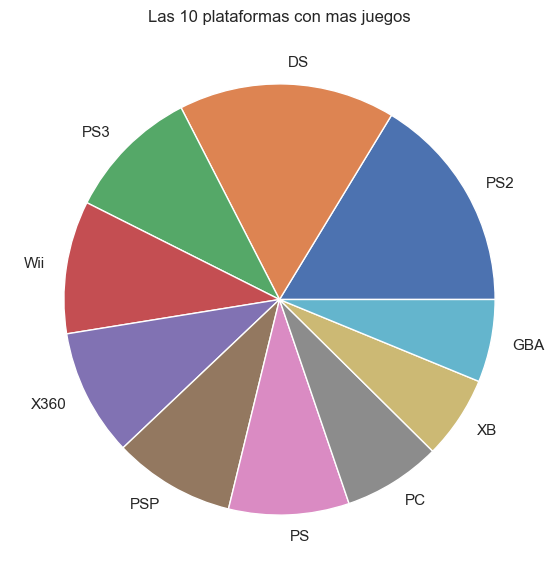

In [227]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(platform_sum, labels = platform_sum.index)
plt.title("Las 10 plataformas con mas juegos")

Este grafico nos ayuda a ver cuales son las 10 plataformas que mas juegos aportaron a la lista.

In [230]:
na_sum = df.groupby(['Genre'])['NA_Sales'].sum()
na_sum

Genre
Action          879.01
Adventure       105.26
Fighting        223.36
Misc            407.27
Platform        445.50
Puzzle          122.87
Racing          359.35
Role-Playing    330.81
Shooter         592.24
Simulation      182.19
Sports          684.43
Strategy         68.55
Name: NA_Sales, dtype: float64

Text(0.5, 1.0, 'Los generos con mas volumen de ventas en Norteamerica')

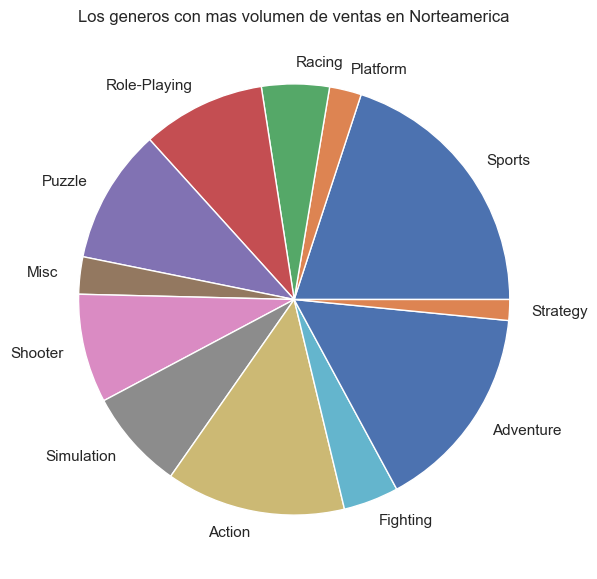

In [233]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(na_sum, labels = generos)
plt.title("Los generos con mas volumen de ventas en Norteamerica")

Este grafico nos muestra los generos mas vendidos en Norteamerica, siguiendo el patron a nivel global, con "Deportes" y "Estrategia" a la cabeza.

In [231]:
eu_sum = df.groupby(['Genre'])['EU_Sales'].sum()
eu_sum

Genre
Action          519.13
Adventure        63.54
Fighting        100.33
Misc            212.74
Platform        200.35
Puzzle           50.01
Racing          236.51
Role-Playing    188.71
Shooter         317.34
Simulation      113.52
Sports          376.79
Strategy         45.17
Name: EU_Sales, dtype: float64

Text(0.5, 1.0, 'Los generos con mas volumen de ventas en Europa')

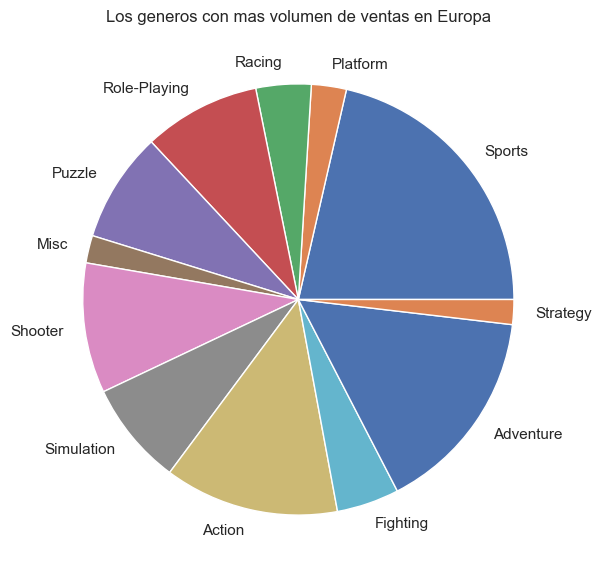

In [234]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(eu_sum, labels = generos)
plt.title("Los generos con mas volumen de ventas en Europa")

Lo mismo pasa cuando miramos las mismas estadisticas de ventas, pero en Europa.

In [232]:
jp_sum = df.groupby(['Genre'])['JP_Sales'].sum()
jp_sum

Genre
Action          161.44
Adventure        52.30
Fighting         87.48
Misc            108.11
Platform        130.83
Puzzle           57.31
Racing           56.71
Role-Playing    355.46
Shooter          38.76
Simulation       63.80
Sports          135.54
Strategy         49.66
Name: JP_Sales, dtype: float64

Text(0.5, 1.0, 'Los generos con mas volumen de ventas en Japon')

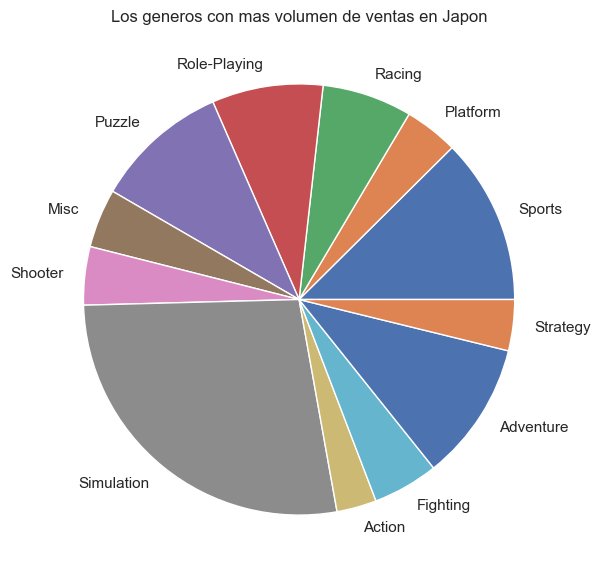

In [236]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(jp_sum, labels = generos)
plt.title("Los generos con mas volumen de ventas en Japon")

Sin embargo, cuando analizamos las ventas solo de Japon, podemos ver que la categoria "Simulacion", tiene el puntaje mas alto.